# Superstore Sales Analysis



##  1. Dataset Overview

This dataset contains 9,994 sales transactions from a Superstore with 21 feature columns, covering customer information, products, location, time, and financial performance such as sales, discount, and profit.

### Dataset Contents:
- **Order ID, Order Date, Ship Date, Customer Name, Segment Region, State, City, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit**

###  Sample Data:
Here are the first 10 rows of the dataset:


In [14]:
!pip install kagglehub
import pandas as pd
import os
import kagglehub

path = kagglehub.dataset_download("vivek468/superstore-dataset-final") #download from kaggle
print("Files downloaded:", os.listdir(path)) #checking csv
csv_filename = "Sample - Superstore.csv"
csv_path = os.path.join(path, csv_filename) 

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path, encoding="ISO-8859-1") #read
    display(df.head(10))  #show



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\THINKPAD\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Files downloaded: ['Sample - Superstore.csv']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


## 2. Data Cleaning

- change `Order Date` and `Ship Date` coloumn to `datetime` values.
- checking missing values.
- checking duplicate data.


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%m/%d/%Y") #datetime formatting

missing_values = df.isnull().sum()
print(" Missing values per kolom:\n", missing_values) #checking missing value

duplicate_count = df.duplicated().sum()
print("\n duplicate count data: {duplicate_count}")
print("\n data coloumn:\n", df.dtypes) #checking duplicate

 Missing values per kolom:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

 duplicate count data: {duplicate_count}

 data coloumn:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category         

In [ ]:
df.to_pickle("cleaned_superstore.pkl")
df.to_csv("cleaned_superstore.csv", index=False) #change to pickle, to recall another ipynb


## 3. Time Series Analysis

To understand business performance over time, we aggregated **Sales** and **Profit** on a monthly basis.

From this visualization, we can:

- Identify peak months  
- Detect downward or upward profit trends  
- Formulate seasonal sales strategies based on historical data

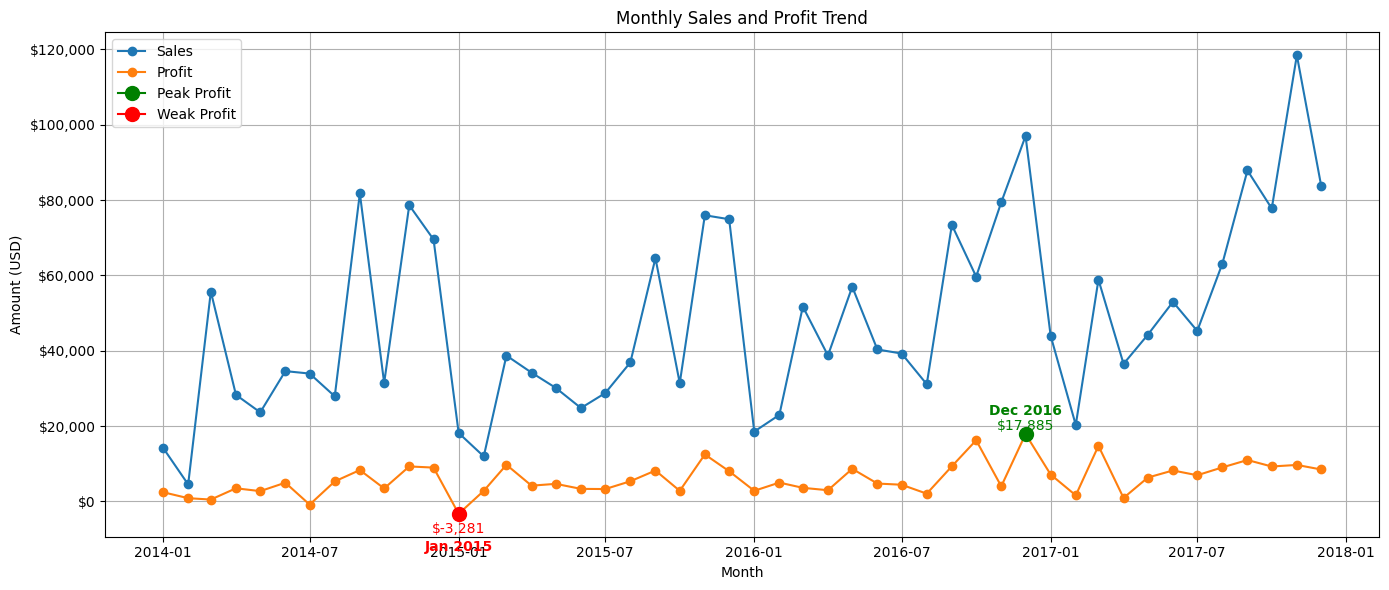

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df["Order Date"] = pd.to_datetime(df["Order Date"]) #recheck date format
df["YearMonth"] = df["Order Date"].dt.to_period("M") #used monthly periodic graph

monthly_trend = df.groupby("YearMonth")[["Sales", "Profit"]].sum()
monthly_trend.index = monthly_trend.index.to_timestamp() #trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend.index, monthly_trend["Sales"], label="Sales", marker="o")
plt.plot(monthly_trend.index, monthly_trend["Profit"], label="Profit", marker="o") #plot mark

plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount (USD)") #labelling

currency_format = ticker.FuncFormatter(lambda x, _: f"${x:,.0f}")
plt.gca().yaxis.set_major_formatter(currency_format) #currency addition

peak_idx = monthly_trend["Profit"].idxmax()
peak_val = monthly_trend["Profit"].max()
weak_idx = monthly_trend["Profit"].idxmin()
weak_val = monthly_trend["Profit"].min() #detect peak value and profit
plt.plot(peak_idx, peak_val, marker="o", color="green", markersize=10, label="Peak Profit")
plt.text(peak_idx, peak_val + 1000, f"${peak_val:,.0f}", color="green", ha='center', fontsize=10)
plt.text(peak_idx, peak_val + 5000, peak_idx.strftime("%b %Y"), color="green", ha='center', fontsize=10, fontweight='bold')
plt.plot(weak_idx, weak_val, marker="o", color="red", markersize=10, label="Weak Profit")
plt.text(weak_idx, weak_val - 5000, f"${weak_val:,.0f}", color="red", ha='center', fontsize=10)
plt.text(weak_idx, weak_val - 10000, weak_idx.strftime("%b %Y"), color="red", ha='center', fontsize=10, fontweight='bold')
#marker

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() #legend


### Comparative Analysis: Highest vs Lowest Profit Month

To understand the factors affecting profitability, we compare two extreme periods:

- **Highest Profit Month**: `{{ peak_month }}`
- **Lowest Profit Month**: `{{ weak_month }}`

The comparison is conducted across key business dimensions such as *Segment*, *Category*, *Region*, and *Discount*.
The goal is to identify positive patterns from the best-performing month and improvement opportunities from the weakest one.


In [ ]:
df["YearMonth"] = df["Order Date"].dt.to_period("M") #recall month period

peak_month_data = df[df["YearMonth"] == peak_idx.to_period("M")]
weak_month_data = df[df["YearMonth"] == weak_idx.to_period("M")] #detect weakest and highest profit

peak_segment = peak_month_data["Segment"].value_counts(normalize=True) * 100
weak_segment = weak_month_data["Segment"].value_counts(normalize=True) * 100 #segmentation

segment_comparison = pd.DataFrame({
    "Peak Month (%)": peak_segment,
    "Weak Month (%)": weak_segment
}).fillna(0).round(2) #/100 comparation

segment_comparison #display


,Peak Month (%),Weak Month (%)
Segment,,
Consumer,47.73,43.10
Corporate,36.93,44.83
Home Office,15.34,12.07


**Insight:**
- The Consumer and Home Office segments have a higher proportion in the month with the highest profit compared to the month with the lowest profit.
- On the other hand, the Corporate segment dominates in the month with the lowest profit (44.83%) compared to the month with the highest profit (36.93%).

**Interpretation:**
- This indicates that the Consumer and Home Office segments likely provide higher margins or more efficient sales during months with high profits.
- The Corporate segment, although often considered stable, should be evaluated further because its high proportion during loss months may be due to significant discounts or low-margin products.

**Bussiness Startegy:**
- Strengthen customer acquisition and retention strategies for the Consumer and Home Office segments, especially during peak periods like the end of the year.
- Reassess the offerings and pricing strategies for the Corporate segment, as high volume doesn't necessarily correlate with profit.

## 4. Monthly Trend Analysis of Sales and Profit

This chart shows the monthly trends of Sales and Profit throughout the data period. This analysis is useful for understanding seasonal patterns, anomalies, and growth trends underlying business performance over time ([Hyndman & Athanasopoulos, 2018](https://otexts.com/fpp2/))

### Methodology
The data was converted to monthly format using Order Date, then sales and profit values were aggregated. A time series visualization helps in detecting fluctuation patterns and long-term trends.([Box et al., 2015](https://www.wiley.com/en-us/Time+Series+Analysis%3A+Forecasting+and+Control%2C+5th+Edition-p-9781118675021)).

### Insight:
- Significant monthly fluctuations in sales indicate a seasonal pattern in consumer behavior(([Hyndman & Athanasopoulos, 2018](https://otexts.com/fpp2/)))
- Some months show high sales but profits do not increase proportionally, suggesting possible low margins or rising operational costs ([Kotler & Keller, 2016](https://www.pearson.com/en-us/subject-catalog/p/marketing-management/P200000004938/9780133856460)).
- Profit tends to be more volatile than sales, indicating a need for better internal efficiency management ([Kaplan & Norton, 1996](https://hbr.org/1992/01/the-balanced-scorecard-measures-that-drive-performance)).

### Strategi Bisnis yang Direkomendasikan:

1. Focus resources on high-performing months based on historical patterns.
2. Evaluate high-sales but low-profit products for potential price adjustments or cost efficiency improvements.
3. Use trend patterns as a foundation for long-term planning and seasonal promotion strategy development ([Kotler & Keller, 2016](https://www.pearson.com/en-us/subject-catalog/p/marketing-management/P200000004938/9780133856460)).
